In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Evaluation Matrix from Classification

<hr>

### 1. Confusion Matrix

- Cross table yang menampilkan jumlah data antara : y actual (true), y actual (false), y prediksi (true), y prediksi (false)

In [2]:
# Misal data aktual = y, prediksi model = yp
y = ['Yes', 'No', 'Yes', 'No', 'Yes', 'No']
yp = ['Yes', 'Yes', 'Yes', 'No', 'Yes','Yes']

Confusion Matrix

-|Pred "Yes"|Pred "No"|
---|---|---
__Aktual "Yes"__|__3__|__0__|
__Aktual "No"__|__2__|__1__|


- __True__ : data prediksi == data aktual
- __False__ : data prediksi != data aktual
- __Positive__ : prediksi positif / 1 / yes
- __Negative__ : prediksi negatif / 0 / No
    
- __True Positive (TP)__ : Prediksi Yes, Aktual Yes
- __True Negative (TN)__ : Prediksi No, Aktual No
- __False Positive (FP)__ : Prediksi Yes, Aktual No
- __False Negative (FN)__ : Prediksi No, Aktual Yes

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
cm = confusion_matrix(y,yp, labels= ["Yes","No"])
dfcm = pd.DataFrame(
    cm, columns=['Pred Y','Pred N'], index= ['Actual Y', 'Actual N']
)
dfcm

,Pred Y,Pred N
Actual Y,3,0
Actual N,2,1


<hr>

### 2. Confusion Matrix Example

In [9]:
x = np.array(range(1, 11))
y = [0,0,0,0,1,0,1,1,1,1]

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()
model.fit(x.reshape(-1, 1), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
yp = model.predict(x.reshape(-1,1))
yp

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [13]:
# create confusion matrix manually
print(y)
print(list(yp))

[0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


-|Pred 1|Pred 0|
---|---|---
__Aktual 1__|__TP = 4__|__FN = 1__|
__Aktual 0__|__FP = 1__|__TN = 4__|

In [14]:
cm = confusion_matrix (y,yp, labels=[1,0])
dfcm = pd.DataFrame(
    cm, columns=['Pred 1','Pred 0'], index= ['Actual 1', 'Actual 0']
)
dfcm

,Pred 1,Pred 0
Actual 1,4,1
Actual 0,1,4


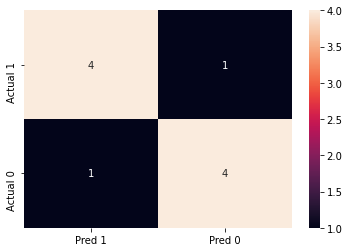

In [15]:
# confusion matrix plot
sb.heatmap(dfcm, annot=True)

In [16]:
# sklearn confusion matrix plot

from sklearn.metrics import plot_confusion_matrix

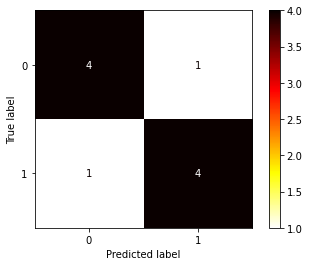

In [17]:
plot_confusion_matrix(
    model, x.reshape(-1,1),y, cmap='hot_r'# model, x, y
)

<hr>

### 3. Confusion Matrix for Multi-class Classification

Non-binary classification a.k.a Multi-Class Clasification

In [18]:
y = ["kura-kura", "penyu", "platipus","kura-kura", "penyu", "platipus"]
yp = ["kura-kura", "kura-kura", "platipus", "penyu", "penyu", "platipus"]

-|Pred Kura|Pred Penyu| Pred Platipus
---|---|---|---
__Aktual Kura__|__1__|__1__|__0__
__Aktual Penyu__|__1__|__1__|__0__
__Aktual Platipus__|__0__|__0__|__2_

In [19]:
cm = confusion_matrix(y,yp,labels=['kura-kura','penyu','platipus'])
cm

array([[1, 1, 0],
       [1, 1, 0],
       [0, 0, 2]], dtype=int64)

In [20]:
dfcm = pd.DataFrame(
    cm,
    columns = ['Pred Kura', 'Pred Penyu', 'Pred Platipus'],
    index = ['Aktual Kura', 'Aktual Penyu', 'Aktual Platipus']
)
dfcm

,Pred Kura,Pred Penyu,Pred Platipus
Aktual Kura,1,1,0
Aktual Penyu,1,1,0
Aktual Platipus,0,0,2


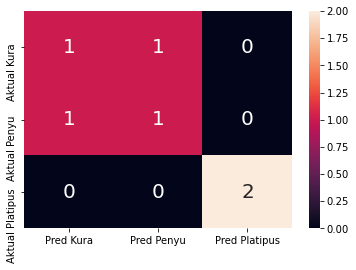

In [21]:
sb.heatmap(dfcm, annot=True, annot_kws={'size':20})

<hr>

### 4. TP, TN, FP, & FN on Confusion Matrix for Multi-class Clasification

- declare TP,TN, FP, FN for label = 'Kura-Kura'
- declare TP,TN, FP, FN for label = 'Penyu'
- declare TP,TN, FP, FN for label = 'Platipus'

__A. TP, TN, FP, & FN for label = "kura-kura"__

-|Pred Kura|Pred Penyu| Pred Platipus
---|---|---|---
__Aktual Kura__| __$\textrm{TP}_\textrm{kura}$ = 1__|__$\textrm{FN}_\textrm{kura}$ = 1__|__$\textrm{FN}_\textrm{kura}$ = 0__
__Aktual Penyu__|__$\textrm{FP}_\textrm{kura}$ = 1__|__$\textrm{TN}_\textrm{kura}$ = 1__|__$\textrm{TN}_\textrm{kura}$ = 0__
__Aktual Platipus__|__$\textrm{FP}_\textrm{kura}$ = 1__|__$\textrm{TN}_\textrm{kura}$ = 0__|__$\textrm{TN}_\textrm{kura}$ = 2__

__B. TP, TN, FP, & FN for label = "penyu"__

-|Pred Kura|Pred Penyu| Pred Platipus
---|---|---|---
__Aktual Kura__| __$\textrm{TN}_\textrm{penyu}$ = 1__|__$\textrm{FP}_\textrm{penyu}$ = 1__|__$\textrm{TN}_\textrm{penyu}$ = 0__
__Aktual Penyu__|__$\textrm{FN}_\textrm{penyu}$ = 1__|__$\textrm{TP}_\textrm{penyu}$ = 1__|__$\textrm{FN}_\textrm{penyu}$ = 0__
__Aktual Platipus__|__$\textrm{TN}_\textrm{penyu}$ = 1__|__$\textrm{FP}_\textrm{penyu}$ = 0__|__$\textrm{TN}_\textrm{penyu}$ = 2__

__C. TP, TN, FP, & FN for label = "platipus"__

-|Pred Kura|Pred Penyu| Pred Platipus
---|---|---|---
__Aktual Kura__| __$\textrm{TN}_\textrm{platipus}$ = 1__|__$\textrm{TN}_\textrm{platipus}$ = 1__|__$\textrm{FP}_\textrm{platipus}$ = 0__
__Aktual Penyu__|__$\textrm{TN}_\textrm{platipus}$ = 1__|__$\textrm{TN}_\textrm{platipus}$ = 1__|__$\textrm{FP}_\textrm{platipus}$ = 0__
__Aktual Platipus__|__$\textrm{FN}_\textrm{platipus}$ = 1__|__$\textrm{FN}_\textrm{platipus}$ = 0__|__$\textrm{TP}_\textrm{platipus}$ = 2__

# Evaluation Metrics for Classification Model

In [22]:
y = [0,0,0,0,1,0,1,1,1,1]
yp = [0,0,0,0,0,1,1,1,1,1]

In [23]:
cm = confusion_matrix(y,yp,labels=[1,0])
cm

array([[4, 1],
       [1, 4]], dtype=int64)

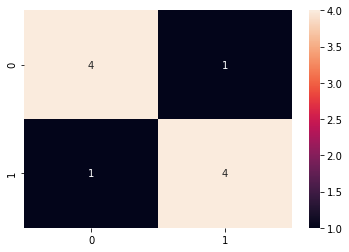

In [24]:
sb.heatmap(cm,annot=True)

In [25]:
tp,fn,fp,tn =cm.reshape(-1,)

<hr>

1. __Accuracy__ : seberapa sering model memprediksi dengan benar
    
$$ \textrm{Accuracy} = \frac{TP + TN}{total data} $$

$$ \textrm{Accuracy} = \frac{4 + 4}{10} = 80\textrm{%} $$  


2. __Error Rate/Missclassification Rate__ : seberapa sering model memprediksi dengan salah

$$ \textrm{Error Rate}= \frac{FP + FN}{total data} $$

$$ \textrm{Error Rate}= \frac{1 + 1}{10} = 20\textrm{%} $$

$$ \textrm{Accuracy} + \textrm{Error Rate} = 100 \textrm{%} $$


<hr>

3. __TP Rate/Sensitivity/Recall Positive__ : Jika aktualnya = 1/yes/positif, maka seberapa sering model memprediksi 1/yes/positif

$$ \textrm{TP Rate}= \frac{TP}{total aktual positive \textrm(TP+FN)} $$

$$ \textrm{TP Rate}= \frac{4}{4+1} = 80\textrm{%}  $$

4. __FN Rate__ : Jika aktualnya =  1/yes/positif maka seberapa sering model memprediksi 0/no/negative

$$ \textrm{FN Rate}= \frac{FN}{total aktual positive \textrm(TP+FN)} $$

$$ \textrm{FN Rate}= \frac{1}{4+1} = 20\textrm{%}  $$

$$ \textrm{TP Rate} + \textrm{FN Rate} = 100 \textrm{%} $$

<hr>

5. __TN Rate/Specificity/Recall Negative__ : Jika aktualnya = 0/no/negative, maka seberapa sering model memprediksi 0/no/negative

$$ \textrm{TN Rate}= \frac{TN}{total aktual negative \textrm(TN + FP)} $$

$$ \textrm{TN Rate}= \frac{4}{4+1} = 80\textrm{%}  $$

6. __FP Rate__ : Jika aktualnya = 0/no/negative, maka seberapa sering model memprediksi 1/yes/positif

$$ \textrm{FP Rate}= \frac{FP}{total aktual negative \textrm(TN + FP)} $$

$$ \textrm{FP Rate}= \frac{1}{4+1} = 20\textrm{%}  $$

$$ \textrm{TN Rate} + \textrm{FP Rate} = 100 \textrm{%} $$

<hr>

7. __Precision (positive)__ : jika prediksi = 1/yes/positif, seberapa sering prediksi tersebut benar?negatif

$$ \textrm{Precision(+)}= \frac{TP}{\textrm(TP + FP)} $$

$$ \textrm{Precision(+)}= \frac{4}{4+1} = 80\textrm{%}  $$

8. __Precision (negative)__ : jika prediksi = 0/no/, seberapa sering prediksi tersebut benar?

$$ \textrm{Precision(-)}= \frac{TN}{\textrm(TN + FN)} $$

$$ \textrm{Precision(-)}= \frac{4}{4+1} = 80\textrm{%}  $$


<hr>

#### Hanya untuk menggali insight dari hasil prediksi :

9. __Prevalence__ : Berapa kali nilai 1/yes/positif itu terjadi di data sample yang akan diprediksi model?
    
    ```
    Prevalence  = aktual 1/yes/positif / total data
                = (TP + FN) / total data
                = (4+1) / 10
                = 50%
    ```
    
10. __Null Error Rate__ : Berapa kali nilai 0/no/negatif itu terjadi di data sample yang akan diprediksi model?

    ```
    Null Erro Rate  = aktual 0/no/negatif / total data
                = (TN + FP) / total data
                = (4+1) / 10
                = 50%
    ```
    
 $$ Prevalence + \textrm{Null Error Rate} = \textrm{100%} $$

<hr> 

untuk dataset __imbalanced__, nilai accuracy bukan metric yang baik untuk mengevaluasi model

sebagai contoh : data set yang akan diprediksi = 95% label A, 5% label B. Model saya ngaco => mempridiksi semuanya adalah A.
maka akurasi model saya = 95%. maka untuk dataset __imbalanced__, akurasinya gunakan __*Balanced Accuracy(bACC)*__

```
11.    bACC = (Recall(+) TP Rate + Recall(-) TN Rate / 2
         =  (80% + 80%) /2
```

balanced dan imbalanced biasanya dicek untuk data set testing


<hr>

12.  __F1 Score__ : harmonic mea precision(+) & recall (+)

    ```
    F1 Score = 2 *  ( (precision(+} * recall (+)) / (precision(+) + recall (+)) )
             = 2 *  ( (80%*80%) / (80% +80%) )
             = 80%
    ```


<hr>

### Sklearn Evaluation Metrics for Classification Model

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print('Akurasi = ', accuracy_score(y,yp))
print('Error Rate = ', 1 - accuracy_score(y,yp) )

Akurasi =  0.8
Error Rate =  0.19999999999999996


In [28]:
from sklearn.metrics import recall_score

In [29]:
print('Recall(+) = ', recall_score(y,yp, pos_label = 1))
print('Recall(-) = ', recall_score(y,yp, pos_label = 0))

Recall(+) =  0.8
Recall(-) =  0.8


In [30]:
from sklearn.metrics import precision_score

In [31]:
print('Precision(+) = ', precision_score(y,yp, pos_label = 1))
print('Precision(-) = ', precision_score(y,yp, pos_label = 0))

Precision(+) =  0.8
Precision(-) =  0.8


In [32]:
from sklearn.metrics import f1_score

In [33]:
print('F1 Score(+) = ', f1_score(y,yp, pos_label = 1))
print('F1 Score(-) = ', f1_score(y,yp, pos_label = 0))

F1 Score(+) =  0.8000000000000002
F1 Score(-) =  0.8000000000000002


In [34]:
from sklearn.metrics import balanced_accuracy_score

In [35]:
print('bACC = ', balanced_accuracy_score(y,yp))

bACC =  0.8


<hr>

### Sklearn classification Report

1.  __*precision_recall_fscore_support()*__

In [36]:
from sklearn.metrics import precision_recall_fscore_support
# Support = jumlah keejadian tiap class di y aktual

In [38]:
precision_recall_fscore_support(y,yp)

(array([0.8, 0.8]),
 array([0.8, 0.8]),
 array([0.8, 0.8]),
 array([5, 5], dtype=int64))

In [39]:
pre, rec, f1, sup = precision_recall_fscore_support(y,yp)
print('Precision[0,1] = ', pre)
print('Recall[0,1] = ', rec)
print('F1 Score[0,1] = ', f1)
print('Support[0,1] = ', sup)

Precision[0,1] =  [0.8 0.8]
Recall[0,1] =  [0.8 0.8]
F1 Score[0,1] =  [0.8 0.8]
Support[0,1] =  [5 5]


2. __*classification_report()*__

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y, yp))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [ ]:
# cek micro average, macro average, weighted average